In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbs
import datetime
import pymc as pm
import statsmodels.api as sm
from scipy.stats.stats import pearsonr
from pandas.tseries.offsets import BDay
import matplotlib as mpl
pd.options.display.max_columns = 50

c:\users\pc\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels-0.8.0-py3.6-win32.egg\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import pickle
def save_obj(obj, name):
    with open('C:/Users/pc/Desktop/SG_project/Pickled/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name):
    with open('C:/Users/pc/Desktop/SG_project/Pickled/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
dictionary_commodities = load_obj("dictionary_commodities")
dictionary_financials = load_obj("dictionary_financials")

In [4]:
dictionary_commodities.keys()

dict_keys(['CORN - CHICAGO BOARD OF TRADE', 'OATS - CHICAGO BOARD OF TRADE', 'COTTON NO. 2 - ICE FUTURES U.S.', 'ROUGH RICE - CHICAGO BOARD OF TRADE', 'LEAN HOGS - CHICAGO MERCANTILE EXCHANGE', 'LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE', 'FEEDER CATTLE - CHICAGO MERCANTILE EXCHANGE', 'SOYBEANS - CHICAGO BOARD OF TRADE', 'SOYBEAN OIL - CHICAGO BOARD OF TRADE', 'SOYBEAN MEAL - CHICAGO BOARD OF TRADE', 'COCOA - ICE FUTURES U.S.', 'SUGAR NO. 11 - ICE FUTURES U.S.', 'COFFEE C - ICE FUTURES U.S.', 'CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE EXCHANGE', 'GOLD - COMMODITY EXCHANGE INC.', 'NATURAL GAS - NEW YORK MERCANTILE EXCHANGE', 'NATURAL GAS ICE HENRY HUB - ICE FUTURES ENERGY DIV', 'COPPER-GRADE #1 - COMMODITY EXCHANGE INC.', 'FRZN CONCENTRATED ORANGE JUICE - ICE FUTURES U.S.'])

In [5]:
dictionary_financials.keys()

dict_keys(['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE', 'VIX FUTURES - CBOE FUTURES EXCHANGE', 'EURO FX - CHICAGO MERCANTILE EXCHANGE', '3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE', 'BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE', 'JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE', '2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', '10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', '5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', 'CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE'])

In [6]:
df = load_obj("df_generic1_prices")
df.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,gold_futeres_price,coffee_futeres_price,nut_gas_ice_futeres_price,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price,SG_CTA
2010-10-01,1142.25,24.75,120.07,0.4145,1.2565,2.5097,95.845,689.25,95.950,111.800,1316.1,181.10,46.76,3.797,81.58,43.49,465.75,155.65,23.36,369.05,109.757812,120.906250,126.078125,2010.976434
2010-10-04,1134.75,25.15,120.03,0.4066,1.2241,2.4758,95.890,683.00,95.100,110.500,1315.4,172.50,46.38,3.727,81.47,43.10,471.50,154.65,22.99,366.40,109.773438,121.093750,126.468750,2005.892686
2010-10-05,1154.75,23.65,120.28,0.3987,1.1917,2.4722,95.875,701.00,95.550,109.550,1338.9,177.00,47.12,3.743,82.82,43.47,491.00,158.50,23.74,372.65,109.773438,121.187500,126.640625,2030.601272
2010-10-06,1155.75,23.25,120.65,0.3829,1.1593,2.3976,95.925,697.50,94.850,109.200,1346.4,175.55,46.77,3.865,83.23,43.44,488.50,150.45,23.54,375.30,109.828125,121.359375,127.093750,2041.925935
2010-10-07,1156.50,22.95,121.52,0.3512,1.1270,2.3833,95.925,699.50,95.125,108.925,1333.9,173.45,46.54,3.617,81.67,43.79,498.25,151.20,25.16,367.95,109.882812,121.484375,127.140625,2042.460920


In [7]:
df.isnull().sum()

snp_futeres_price                   0
vix_futeres_price                   0
yen_futeres_price                   0
two_years_us_yield                  0
five_years_us_yield                 0
ten_years_us_yield                  0
euro_dollar_futeres_price           0
wheat_hrw_futeres_price             0
live_cattle_futeres_price           0
feeder_cattle_futeres_price         0
gold_futeres_price                  0
coffee_futeres_price                0
nut_gas_ice_futeres_price           0
nut_gas_nymex_futeres_price         0
crude_oil_ls_futeres_price          0
soybean_oil_futeres_price           0
corn_futeres_price                  0
frzn_orange_juice_futures_price     0
sugar_futures_price                 0
copper_futures_price                0
two_tnote_futeres_price             0
five_tnote_futeres_price            0
ten_tnote_futeres_price             0
SG_CTA                             14
dtype: int64

In [7]:
df.fillna(method='ffill', inplace=True)

In [8]:
def get_change_bool(df):
    # create difference column
    df = pd.DataFrame(df)
    df["change"] = df - df.shift(1)
    # drop first row because nan is now present in the "change" column 
    df.drop(df.index[0], inplace=True)
    df["change_bool"] = 0
    # mark days with positive or no change as 0
    # mark days with negative change as 1
    
    df.loc[df["change"] < 0, "change_bool"] = 1
    # crop the data to the same time period as cftc data
    start = load_obj("cftc_index")[0]; end = load_obj("cftc_index")[-1]
    df = df.loc[start:end]
    return df

In [10]:
get_change_bool(df["snp_futeres_price"]).head(10)

,snp_futeres_price,change,change_bool
2011-01-04,1265.250,0.000,0
2011-01-05,1271.750,6.500,0
2011-01-06,1270.250,-1.500,1
2011-01-07,1267.500,-2.750,1
2011-01-10,1265.500,-2.000,1
2011-01-11,1270.500,5.000,0
2011-01-12,1283.500,13.000,0
2011-01-13,1281.250,-2.250,1
2011-01-14,1289.500,8.250,0
2011-01-17,1292.125,2.625,0


In [9]:
def get_neg_ret(df):
    df = get_change_bool(df)
    # column consec_day represents for how many consecutive days there was a decline 
    # column neg_return represents negative cumultive sum 
    if not isinstance(df, pd.DataFrame):
        df = pd.DataFrame(df)
    
    df["cumsum_bool"] = df['change_bool'].cumsum() 
    df["consec_days"] = df['cumsum_bool'].sub(df['cumsum_bool'].mask(df['change_bool'] != 0).ffill(), 
                                        fill_value=0).astype(int)  
    
    df["cumsum_bool_ret"] = df['change'].cumsum() 
    df["neg_return_cum"] = df['cumsum_bool_ret'].sub(df['cumsum_bool_ret'].mask(df['change_bool'] != 0).ffill(), 
                                        fill_value=0) 

    df.drop(["cumsum_bool_ret", 'cumsum_bool', 'change_bool'], 1, inplace=True)

    df["pct_neg_ret_cum"] = round(df["neg_return_cum"]/df[df.columns[0]] * 100, 4)
    df["pct_ret"] = round(df["change"]/df[df.columns[0]] * 100, 4)
    
    return df

In [12]:
get_neg_ret(df["snp_futeres_price"]).head(10)

,snp_futeres_price,change,consec_days,neg_return_cum,pct_neg_ret_cum,pct_ret
2011-01-04,1265.250,0.000,0,0.00,0.0000,0.0000
2011-01-05,1271.750,6.500,0,0.00,0.0000,0.5111
2011-01-06,1270.250,-1.500,1,-1.50,-0.1181,-0.1181
2011-01-07,1267.500,-2.750,2,-4.25,-0.3353,-0.2170
2011-01-10,1265.500,-2.000,3,-6.25,-0.4939,-0.1580
2011-01-11,1270.500,5.000,0,0.00,0.0000,0.3935
2011-01-12,1283.500,13.000,0,0.00,0.0000,1.0129
2011-01-13,1281.250,-2.250,1,-2.25,-0.1756,-0.1756
2011-01-14,1289.500,8.250,0,0.00,0.0000,0.6398
2011-01-17,1292.125,2.625,0,0.00,0.0000,0.2032


In [10]:
def get_neg_df(df, n):
    # get data with n consecutive down days 
    from pandas.tseries.offsets import BDay
    df = get_neg_ret(df)
    df_return = pd.DataFrame()
    #ranges_list = []
    for index in df[df['consec_days'] == n].index:
        # index is the last day in the sequence 
        start = index - BDay(n-1)
        df_return = pd.concat([df_return, df.loc[start:index]])
        #ranges_list.append([start, index])
    return df_return#, ranges_list 

In [14]:
get_neg_df(df["snp_futeres_price"], 7).head(10)

,snp_futeres_price,change,consec_days,neg_return_cum,pct_neg_ret_cum,pct_ret
2011-07-22,1341.00,-1.50,1,-1.50,-0.1119,-0.1119
2011-07-25,1333.50,-7.50,2,-9.00,-0.6749,-0.5624
2011-07-26,1326.25,-7.25,3,-16.25,-1.2253,-0.5467
2011-07-27,1299.00,-27.25,4,-43.50,-3.3487,-2.0978
2011-07-28,1296.75,-2.25,5,-45.75,-3.5281,-0.1735
2011-07-29,1288.50,-8.25,6,-54.00,-4.1909,-0.6403
2011-08-01,1279.75,-8.75,7,-62.75,-4.9033,-0.6837
2011-11-16,1231.00,-23.00,1,-23.00,-1.8684,-1.8684
2011-11-17,1214.75,-16.25,2,-39.25,-3.2311,-1.3377
2011-11-18,1214.00,-0.75,3,-40.00,-3.2949,-0.0618


In [11]:
def map_neg_ret(df_positions, df, n):
    #   
    #   performing a lot of arithmetic to dates, going to check for holidays, othersiwe will not be able to index df
    #   will try to index range within 2 days before and after holiday
    #
    #
    #   class USTradingCalendar is taken from 
    #   https://stackoverflow.com/questions/33094297/create-trading-holiday-calendar-with-pandas      // Pierre Boutquin
    #
    ##############################################################################
    from pandas.tseries.offsets import BDay
    import datetime as dt
    from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, \
        USMartinLutherKingJr, USPresidentsDay, GoodFriday, USMemorialDay, \
        USLaborDay, USThanksgivingDay

    class USTradingCalendar(AbstractHolidayCalendar):
        rules = [
            Holiday('NewYearsDay', month=1, day=1, observance=nearest_workday),
            USMartinLutherKingJr,
            USPresidentsDay,
            GoodFriday,
            USMemorialDay,
            Holiday('USIndependenceDay', month=7, day=4, observance=nearest_workday),
            USLaborDay,
            USThanksgivingDay,
            Holiday('Christmas', month=12, day=25, observance=nearest_workday)
        ]

    def get_trading_close_holidays(year):
        inst = USTradingCalendar()

        return inst.holidays(dt.datetime(year-1, 12, 31), dt.datetime(year, 12, 31))

    if __name__ == '__main__':
        pass    
    ##############################################################################
    neg_df = get_neg_df(df, n)

        
    df_return = neg_df
    df_return["position_change"] = 0
    # 0: Monday, 6: Sunday 
    if len(df_return.index) != 0:
        # monday and friday are close to tuesday 
        # so will get statistics for those days as well 
        mondays = df_return.index[df_return.index.dayofweek == 0]
        tuesdays = df_return.index[df_return.index.dayofweek == 1]
        fridays = df_return.index[df_return.index.dayofweek == 4]
    else:
        return df_return
    
    
    for tuesday in tuesdays:
        # if tuesday, just get the position change 
        year = int(tuesday.year)
        if tuesday in get_trading_close_holidays(year):
            try:
                tuesday = tuesday - BDay(1)
                df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
            except:
                try:
                    tuesday = tuesday + BDay(1)
                    df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                except:
                    try:
                        tuesday = tuesday - BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                    except:
                        tuesday = tuesday + BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
        else:
            df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
    
    for monday in mondays: 
        tuesday = monday + BDay(1)
        year = int(tuesday.year)
        if tuesday in get_trading_close_holidays(year):
            try:
                tuesday = tuesday - BDay(1)
                df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
            except:
                try:
                    tuesday = tuesday + BDay(1)
                    df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                except:
                    try:
                        tuesday = tuesday - BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                    except:
                        tuesday = tuesday + BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]

            # get tuesday's contract price
            df_return.loc[tuesday, df_return.columns[0]] = df.loc[tuesday]
            # get return from monday to tuesday 
            tuesday_ret = df.loc[tuesday] - df.loc[df.index[df.index.get_loc(tuesday)-1]]
            tuesday_ret_pct = tuesday_ret/df.loc[tuesday]*100
            df_return.loc[tuesday, "change"] = tuesday_ret

            if pd.isnull(df_return.loc[tuesday, "consec_days"]):
                df_return.sort_index(inplace=True)
                df_return.loc[tuesday, "neg_return_cum"] = df_return["neg_return_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                consec_days = df_return["consec_days"].loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                if df_return.loc[monday, "consec_days"] == n:
                    df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + tuesday_ret
                    df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + tuesday_ret_pct
                if tuesday_ret < 0:
                    consec_days += 1
                
                df_return.loc[tuesday, "consec_days"] = consec_days.astype(int)
                df_return.loc[tuesday, "pct_ret"] = tuesday_ret_pct            
        else:
            df_return.loc[tuesday, df_return.columns[0]] = df.loc[tuesday]
            tuesday_ret = df.loc[tuesday] - df.loc[df.index[df.index.get_loc(tuesday)-1]]
            tuesday_ret_pct = tuesday_ret/df.loc[tuesday]*100
            df_return.loc[tuesday, "change"] = tuesday_ret

            if pd.isnull(df_return.loc[tuesday, "consec_days"]):
                df_return.sort_index(inplace=True)                
                df_return.loc[tuesday, "neg_return_cum"] = df_return["neg_return_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                consec_days = df_return["consec_days"].loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                if df_return.loc[monday, "consec_days"] == n:
                    df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + tuesday_ret
                    df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + tuesday_ret_pct
                if tuesday_ret < 0:
                    consec_days += 1
                
                df_return.loc[tuesday, "consec_days"] = consec_days.astype(int)
                df_return.loc[tuesday, "pct_ret"] = tuesday_ret_pct          

    
    for friday in fridays:
        tuesday = friday + BDay(2)
        year = int(tuesday.year)
        if tuesday in get_trading_close_holidays(year):
            # find a day which will work 
            try:
                tuesday = tuesday - BDay(1)
                df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
            except:
                try:
                    tuesday = tuesday + BDay(1)
                    df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                except:
                    try:
                        tuesday = tuesday - BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                    except:
                        tuesday = tuesday + BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]

            ############################################################
            df_return.loc[tuesday, df_return.columns[0]] = df.loc[tuesday]
            # get return from friday to monday 
            monday_ret = df.loc[df.index[df.index.get_loc(tuesday)-1]] - df.loc[df.index[df.index.get_loc(tuesday)-2]]
            monday_ret_pct = monday_ret/df.loc[tuesday]*100
            # get return from monday to tuesday
            tuesday_ret = df.loc[tuesday] - df.loc[df.index[df.index.get_loc(tuesday)-1]]
            tuesday_ret_pct = tuesday_ret/df.loc[tuesday]*100
            df_return.loc[tuesday, "change"] = tuesday_ret

            if pd.isnull(df_return.loc[tuesday, "consec_days"]):
                # if no value for consecutive day, calculate it 
                # sort by index, so no mess up in the indexing 
                df_return.sort_index(inplace=True)
                df_return.loc[tuesday, "neg_return_cum"] = df_return["neg_return_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                consec_days = df_return["consec_days"].loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                # if the last consecutive(nth) day is friday
                if df_return.loc[friday, "consec_days"] == n:
                    # add the change from friday to monday 
                    df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + monday_ret
                    df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + monday_ret_pct
                    if monday_ret < 0:
                        # if return was negative add to consec days 
                        consec_days += 1
                        
                if tuesday_ret < 0:
                    # if return was negative add to consec days
                    consec_days += 1
                
                
                df_return.loc[tuesday, "consec_days"] = consec_days.astype(int)
                df_return.loc[tuesday, "pct_ret"] = monday_ret_pct
                df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + tuesday_ret
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + tuesday_ret_pct
            #########################################################################

                        
        else:
            df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
            df_return.loc[tuesday, df_return.columns[0]] = df.loc[tuesday]
            monday_ret = df.loc[df.index[df.index.get_loc(tuesday)-1]] - df.loc[df.index[df.index.get_loc(tuesday)-2]]
            monday_ret_pct = monday_ret/df.loc[tuesday]*100
            tuesday_ret = df.loc[tuesday] - df.loc[df.index[df.index.get_loc(tuesday)-1]]
            tuesday_ret_pct = tuesday_ret/df.loc[tuesday]*100
            df_return.loc[tuesday, "change"] = tuesday_ret

            if pd.isnull(df_return.loc[tuesday, "consec_days"]):
                df_return.sort_index(inplace=True)                
                df_return.loc[tuesday, "neg_return_cum"] = df_return["neg_return_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                consec_days = df_return["consec_days"].loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                if df_return.loc[friday, "consec_days"] == n:
                    df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + monday_ret
                    df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + monday_ret_pct
                    if monday_ret < 0:
                        consec_days += 1
                if tuesday_ret < 0:
                    consec_days += 1
                
                
                df_return.loc[tuesday, "consec_days"] = consec_days.astype(int)
                df_return.loc[tuesday, "pct_ret"] = monday_ret_pct
                df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + tuesday_ret
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + tuesday_ret_pct
            
            

 
    df_return.sort_index(inplace=True)
    df_return["pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"].round(3)
    df_return["pct_ret"] = df_return["pct_ret"].round(3)
    df_return["consec_days"] = df_return["consec_days"].astype(int) 
    return df_return

In [16]:
map_neg_ret(dictionary_financials["E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE"]\
['Change_in_Net_Positioning_Asset_Mgr'], df["snp_futeres_price"], 8).head(10)

,snp_futeres_price,change,consec_days,neg_return_cum,pct_neg_ret_cum,pct_ret,position_change
2011-07-22,1341.00,-1.50,1,-1.50,-0.112,-0.112,0.0
2011-07-25,1333.50,-7.50,2,-9.00,-0.675,-0.562,0.0
2011-07-26,1326.25,-7.25,3,-16.25,-1.225,-0.547,54724.0
2011-07-27,1299.00,-27.25,4,-43.50,-3.349,-2.098,0.0
2011-07-28,1296.75,-2.25,5,-45.75,-3.528,-0.174,0.0
2011-07-29,1288.50,-8.25,6,-54.00,-4.191,-0.640,0.0
2011-08-01,1279.75,-8.75,7,-62.75,-4.903,-0.684,0.0
2011-08-02,1247.25,-32.50,8,-95.25,-7.637,-2.606,-222173.0
2011-11-16,1231.00,-23.00,1,-23.00,-1.868,-1.868,0.0
2011-11-17,1214.75,-16.25,2,-39.25,-3.231,-1.338,0.0


In [12]:
def get_neg_range_days(df_positions, df, min_, max_):
    days_return = pd.DataFrame()
    for i in range(min_, max_+1):
        to_concat = map_neg_ret(df_positions, df, i)
        days_return = pd.concat([days_return, to_concat]) 
    days_return.sort_index(inplace=True)
    return days_return

In [18]:
get_neg_range_days(dictionary_financials["E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE"]\
['Change_in_Net_Positioning_Asset_Mgr'], df["snp_futeres_price"], 5, 10).head(10)
# there is duplicates because when we look for a range of consecutive days, whatever is bellow the upper bound 
# is going to be repeated
# dealing with that in drop_zeros function

,change,consec_days,neg_return_cum,pct_neg_ret_cum,pct_ret,position_change,snp_futeres_price
2011-05-02,-2.00,1.0,-2.00,-0.147,-0.147,0.0,1357.75
2011-05-03,-5.75,2.0,-7.75,-0.573,-0.425,-9665.0,1352.00
2011-05-04,-9.00,3.0,-16.75,-1.247,-0.670,0.0,1343.00
2011-05-05,-8.00,4.0,-24.75,-1.854,-0.599,0.0,1335.00
2011-05-06,-0.50,5.0,-25.25,-1.892,-0.038,0.0,1334.50
2011-05-10,11.00,5.0,-6.00,-0.470,0.609,34549.0,1353.75
2011-07-22,-1.50,1.0,-1.50,-0.112,-0.112,0.0,1341.00
2011-07-22,-1.50,1.0,-1.50,-0.112,-0.112,0.0,1341.00
2011-07-22,-1.50,1.0,-1.50,-0.112,-0.112,0.0,1341.00
2011-07-22,-1.50,1.0,-1.50,-0.112,-0.112,0.0,1341.00


In [13]:
def drop_zeros(df, min_):
    df = df[~df.index.duplicated(keep='first')]
    df = df[df["position_change"] !=0]
    df = df[df["consec_days"] >= min_]
    return df

In [20]:
drop_zeros(get_neg_range_days(dictionary_financials["E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE"]\
['Change_in_Net_Positioning_Asset_Mgr'], df["snp_futeres_price"], 5, 10), 5).head(10)

,change,consec_days,neg_return_cum,pct_neg_ret_cum,pct_ret,position_change,snp_futeres_price
2011-05-10,11.00,5.0,-6.00,-0.470,0.609,34549.0,1353.75
2011-08-02,-32.50,8.0,-95.25,-7.509,-2.606,-222173.0,1247.25
2011-08-23,35.25,5.0,-40.00,-3.657,3.043,-46640.0,1158.50
2011-11-22,-8.00,5.0,-71.25,-6.024,-0.676,-49560.0,1182.75
2011-11-29,5.50,8.0,-57.50,-5.119,3.134,76819.0,1196.50
2012-05-22,-1.00,7.0,-42.75,-3.346,1.902,4242.0,1314.75
2012-07-10,-13.75,5.0,-32.50,-2.434,-1.030,-26015.0,1335.50
2012-12-31,36.00,7.0,-52.25,-3.792,-1.884,-31777.0,1420.00
2015-01-06,-21.50,6.0,-91.25,-4.575,-1.078,-70329.0,1994.50
2015-07-28,22.75,5.0,-34.75,-1.695,1.090,-73010.0,2087.25


In [80]:
def plot_df(df, min_, title):
    df = drop_zeros(df, min_)
    
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,16))
    
    y = df["position_change"]; X = df["pct_neg_ret_cum"]
    corr = pearsonr(X.ravel(), y.ravel())
    model = sm.OLS(y, X).fit()
    
    cm = plt.cm.get_cmap('jet')
    scat = ax1.scatter(X, y, cmap=cm, c=df["consec_days"])
    ax1.axhline(y=0, linestyle="--", lw=.5, color='black')
    ax1.set_xlabel("pct cum return", fontsize=15)
    ax1.set_ylabel("position change", fontsize=15)
    annotation = "Correlation= " + str(round(corr[0], 3)) + ";  R^2=" + str(round(model.rsquared, 3))
    ax1.annotate(annotation, (df["pct_neg_ret_cum"].min(), df["position_change"].max()), fontsize=12)
    ax1.plot(X, model.fittedvalues, color='orange', lw=.85)
    cbar = plt.colorbar(scat, ax=ax1, ticks=list(set(df["consec_days"]))) 
    cbar.ax.set_ylabel('days', rotation=270, fontsize=15, labelpad=22)
    ax1.set_title(title, fontsize=15)
    
    get_loc_list = []
    for i in df["pct_neg_ret_cum"].nsmallest(int(df.shape[0] * .075)).index:
        get_loc_list.append(df.index.get_loc(str(i)))
    zipped = zip(get_loc_list, df.index)
    values = list(zipped) 
    eps = 0
    if values:
        eps = abs(df["pct_neg_ret_cum"].iloc[values[0][0]]*.015)
    for i in values:
        s = str(i[1].year)+"/"+str(i[1].month)+"/"+ str(i[1].day)
        x = df["pct_neg_ret_cum"].iloc[i[0]]; 
        y = df["position_change"].iloc[i[0]]
        # shift, so not on the dot itself
        ax1.annotate(s, (x+eps, y+eps), fontsize=12)
        
    #print(model.summary2())
    
    
    days_min = int(min_); days_max = int(df["consec_days"].max())
    total = df["consec_days"].value_counts()
    ratio_neg_change_pos_vs_all_changes = {}
    for n in total.index:
        neg_total = float(sum(df[df["consec_days"]==n]["position_change"] < 0))
        ratio_neg_change_pos_vs_all_changes[n] = "%.1f" % (neg_total/total[n]*100) +"%"
    
    X1 = df["consec_days"]; y1 = df["position_change"]
    corr1 = pearsonr(y1.ravel(), X1.ravel())
    model1 = sm.OLS(y1, X1).fit()
    
    cm1 = plt.cm.get_cmap('jet_r')
    scat1 = ax2.scatter(X1, y1, cmap=cm1, c=df["pct_neg_ret_cum"])
    ax2.axhline(y=0, linestyle="--", lw=.5, color='black')
    ax2.set_xlabel("consec days down", fontsize=15)
    ax2.set_ylabel("position change", fontsize=15)
    ax2.plot(X1, model1.fittedvalues, color='orange', lw=.85)
    annotation1 = "Correlation= " + str(round((corr1[0]), 3)) + ";  R^2=" + str(round(model1.rsquared, 3))
    ax2.annotate(annotation1, (df["consec_days"].min(), df["position_change"].max()), fontsize=12)
    cbar1 = plt.colorbar(scat1, ax=ax2) 
    cbar1.ax.set_ylabel('pct cum ret', rotation=270, fontsize=15, labelpad=22)
    ax2.set_title(title, fontsize=15)
    
    # ratio: total count negative change in position for Nth day vs total count of changes in position
    # in that Nth day
    for days, ratio in ratio_neg_change_pos_vs_all_changes.items():
        ax2.annotate(ratio, (days+.05, 0), verticalalignment='top')


    #print(model1.summary2())

In [36]:
to_plot = get_neg_range_days(dictionary_financials["E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE"]\
['Change_in_Net_Positioning_Asset_Mgr'], df["snp_futeres_price"], 3, 10)

In [84]:
to_plot6 = get_neg_range_days(dictionary_financials["E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE"]\
['Change_in_Net_Positioning_Lev_Money'], df["snp_futeres_price"], 3, 10)

# S&P futures price vs positions Asset Managers

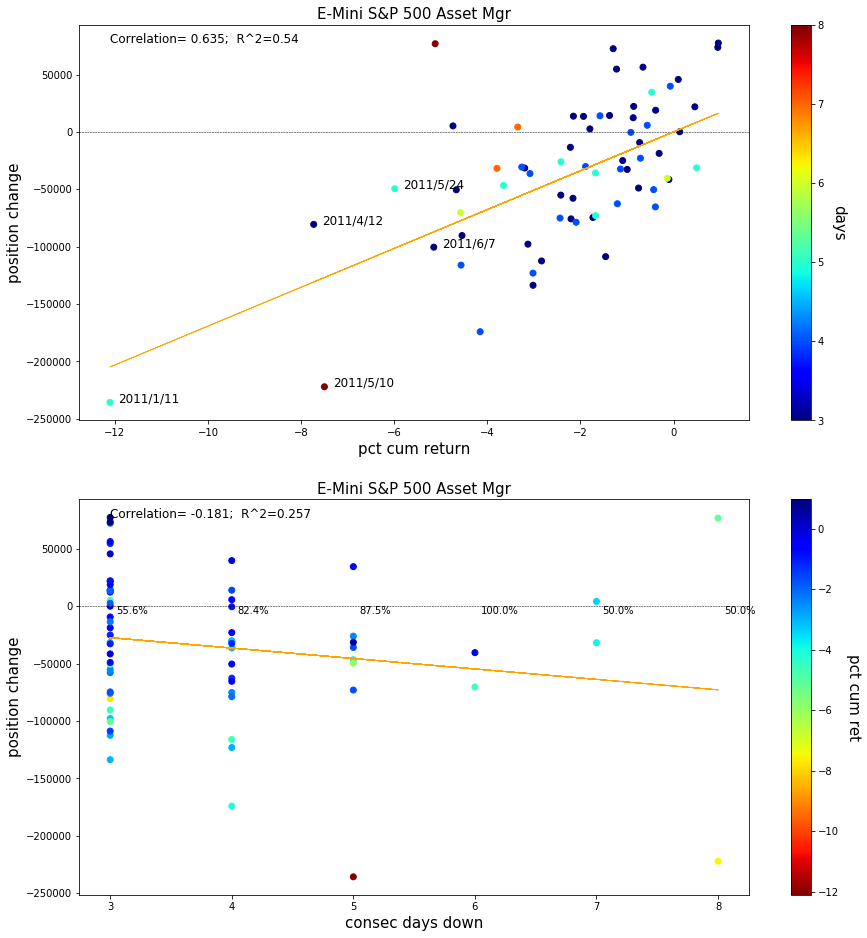

In [82]:
plot_df(to_plot, 3, "E-Mini S&P 500 Asset Mgr")
# percents on the second chart are ratios of neg_changes to total changes

# S&P futures price vs positions Leveraged Money

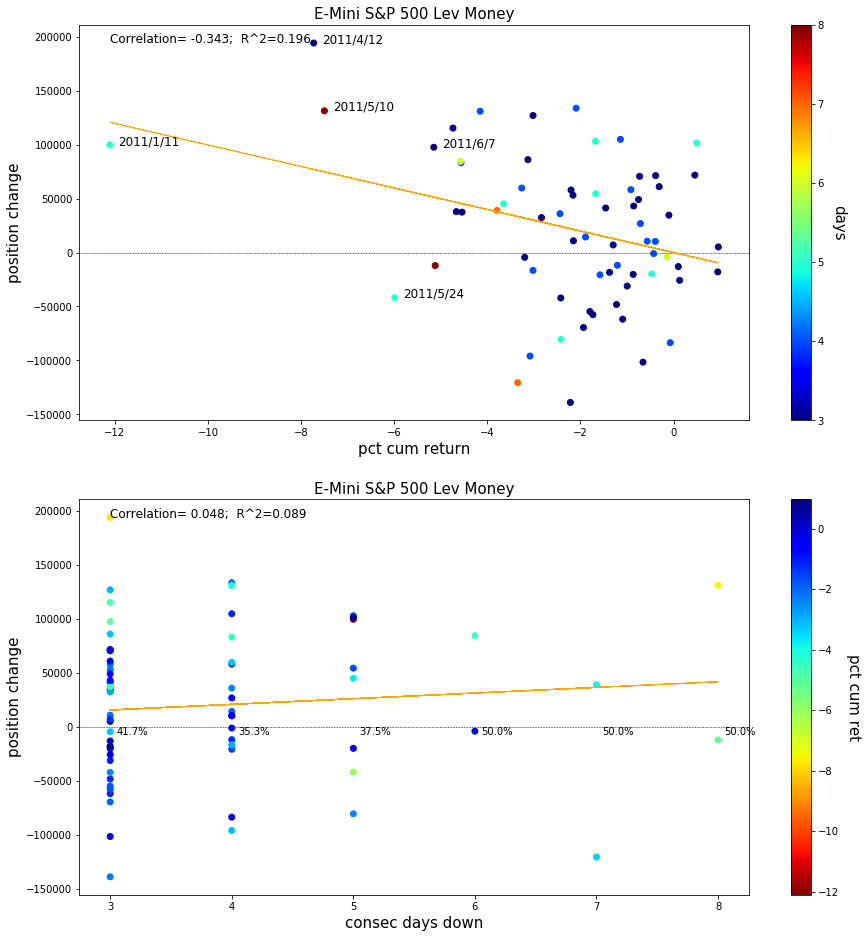

In [85]:
plot_df(to_plot6, 3, "E-Mini S&P 500 Lev Money")

In [86]:
to_plot1 = get_neg_range_days(dictionary_financials["10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE"]\
['Change_in_Net_Positioning_Asset_Mgr'], df["ten_tnote_futeres_price"], 3, 10)

In [87]:
to_plot5 = get_neg_range_days(dictionary_financials["10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE"]\
['Change_in_Net_Positioning_Lev_Money'], df["ten_tnote_futeres_price"], 3, 10)

# 10-Years T-notes futures price vs positions Asset Managers

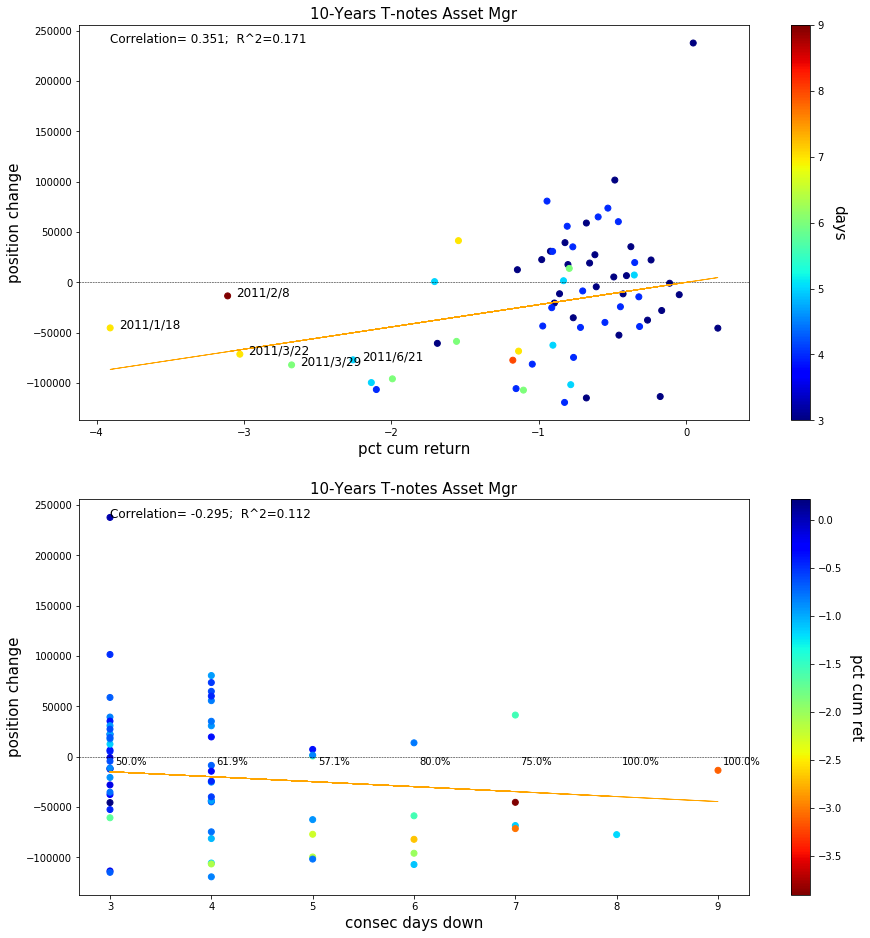

In [88]:
plot_df(to_plot1, 3, "10-Years T-notes Asset Mgr")

# 10-Years T-notes futures price vs positions Leveraged Money

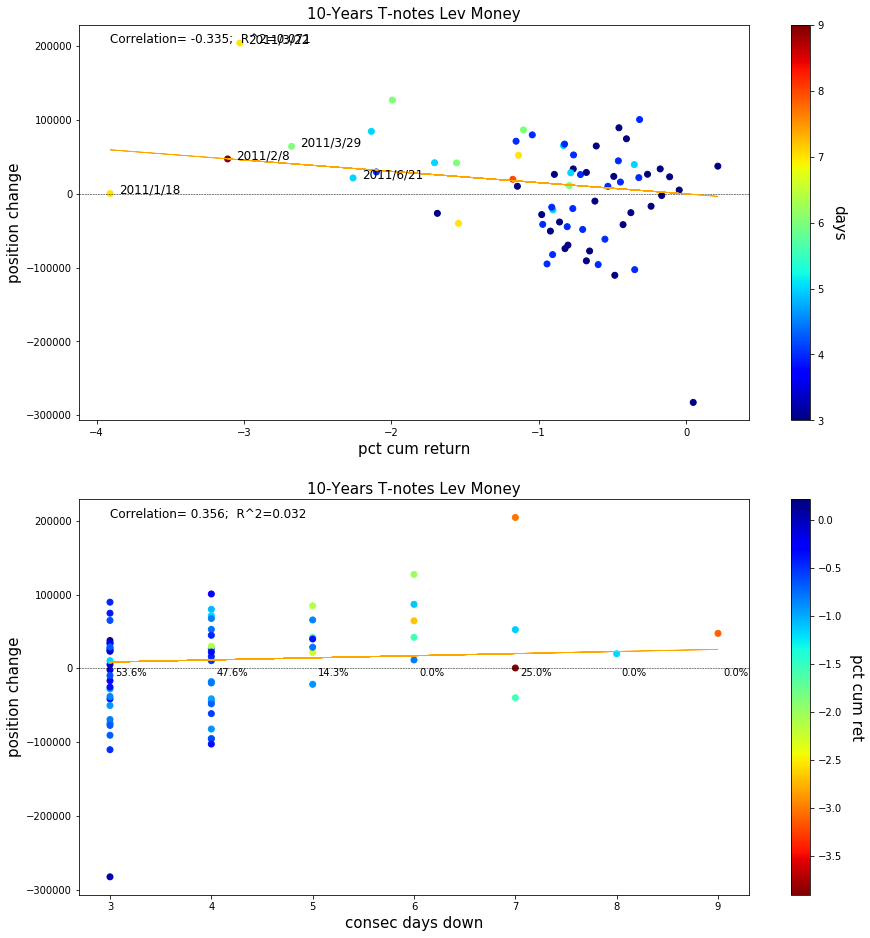

In [89]:
plot_df(to_plot5, 3, "10-Years T-notes Lev Money")

In [90]:
to_plot2 = get_neg_range_days(dictionary_commodities["COFFEE C - ICE FUTURES U.S."]\
["Change_in_Net_Positioning_MM"], df["coffee_futeres_price"], 3, 10)

# Coffee C futures price vs positions Money Managers

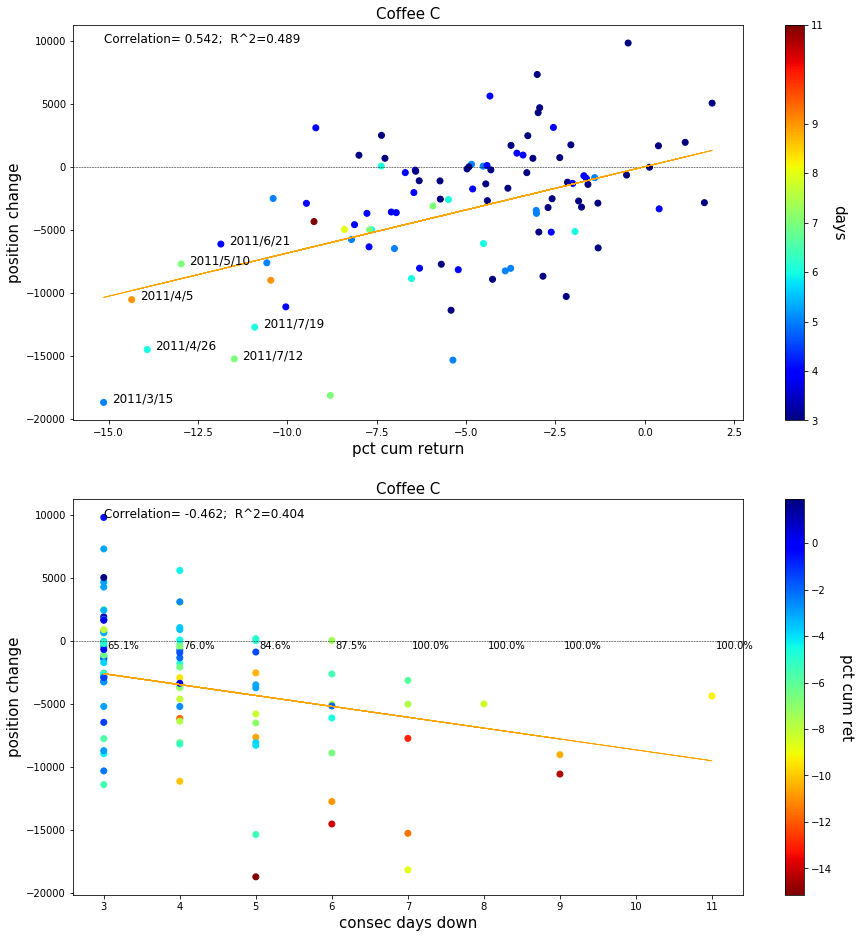

In [91]:
plot_df(to_plot2, 3, "Coffee C")

In [92]:
snp_index = pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/^GSPC.csv", parse_dates=True, index_col=[0], usecols=[0,5])
snp_index = snp_index.rename(columns={"Adj Close":"S&P_index"})

In [93]:
snp_index = snp_index[snp_index.columns[0]]

In [94]:
to_plot3 = get_neg_range_days(dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
['Change_in_Net_Positioning_Asset_Mgr'], df["euro_dollar_futeres_price"], 3, 10)

In [95]:
to_plot4 = get_neg_range_days(dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
['Change_in_Net_Positioning_Lev_Money'], df["euro_dollar_futeres_price"], 3, 10)

# Eurodollar futures price vs positions Asset Managers

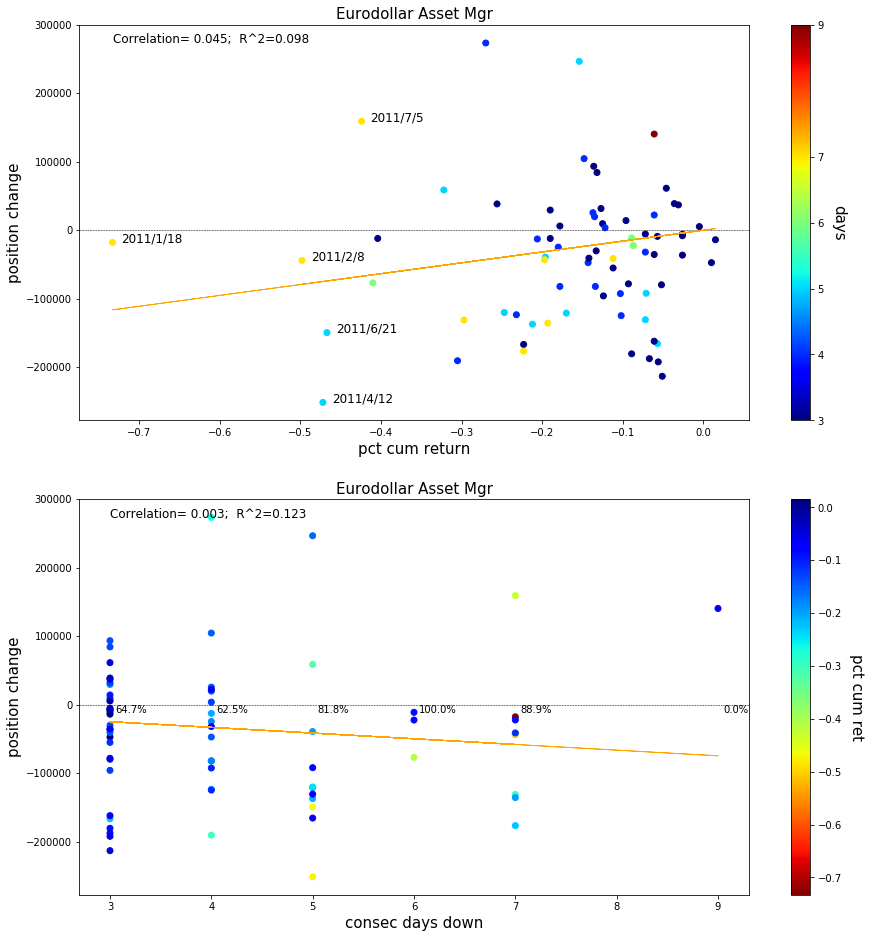

In [96]:
plot_df(to_plot3, 3, "Eurodollar Asset Mgr")

# Eurodollar futures price vs positions Leveraged Money

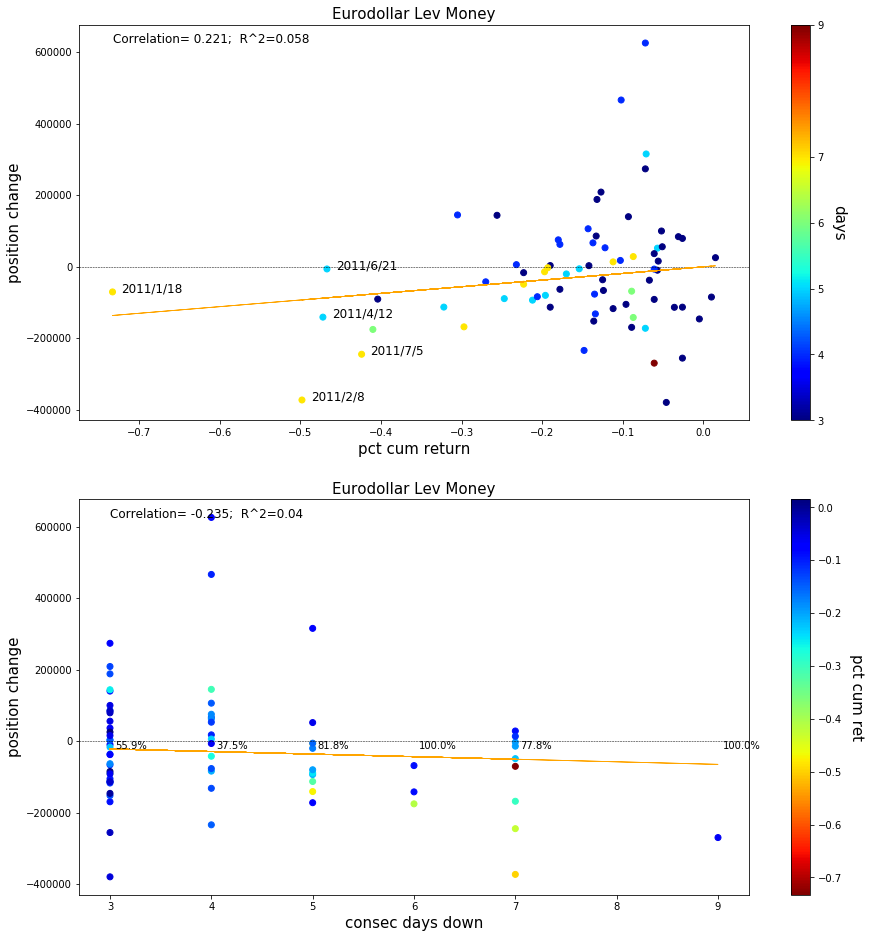

In [97]:
plot_df(to_plot4, 3, "Eurodollar Lev Money")

# Each contract vs S&P 500 index, Asset managers

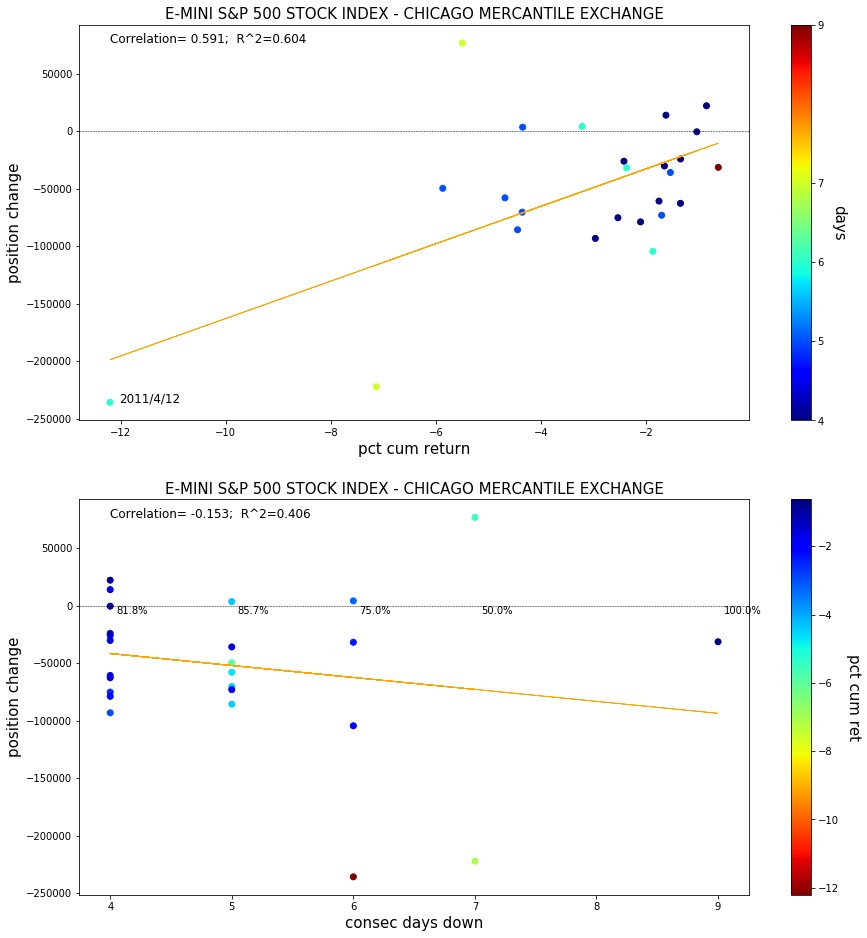

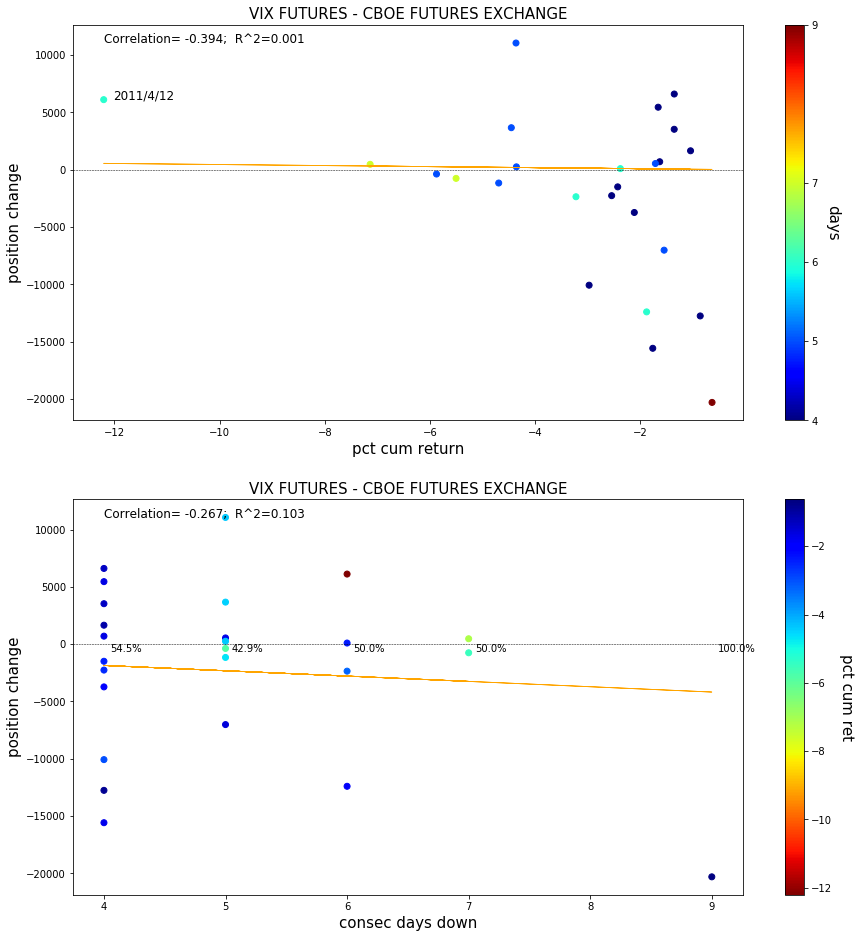

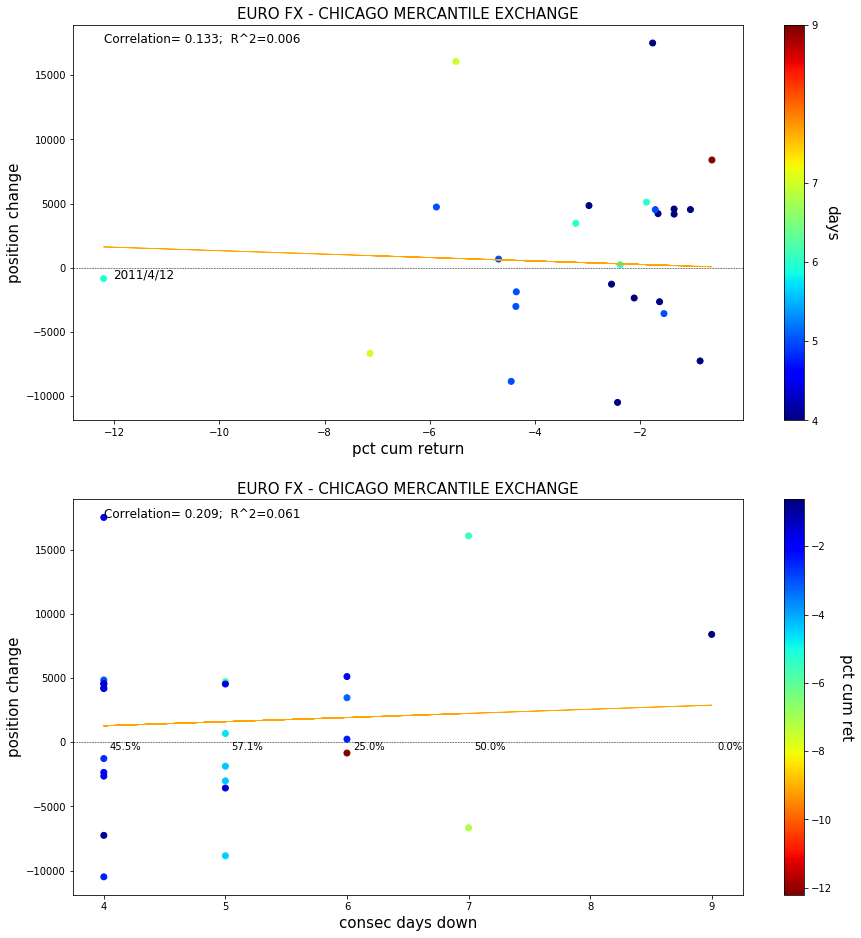

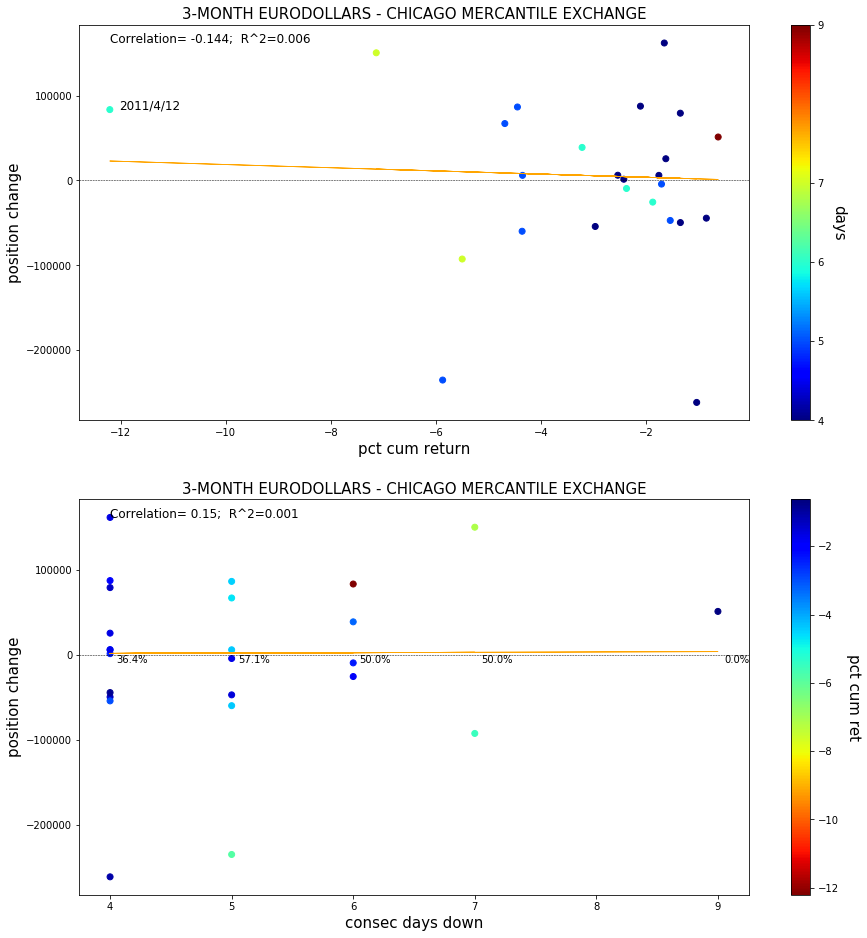

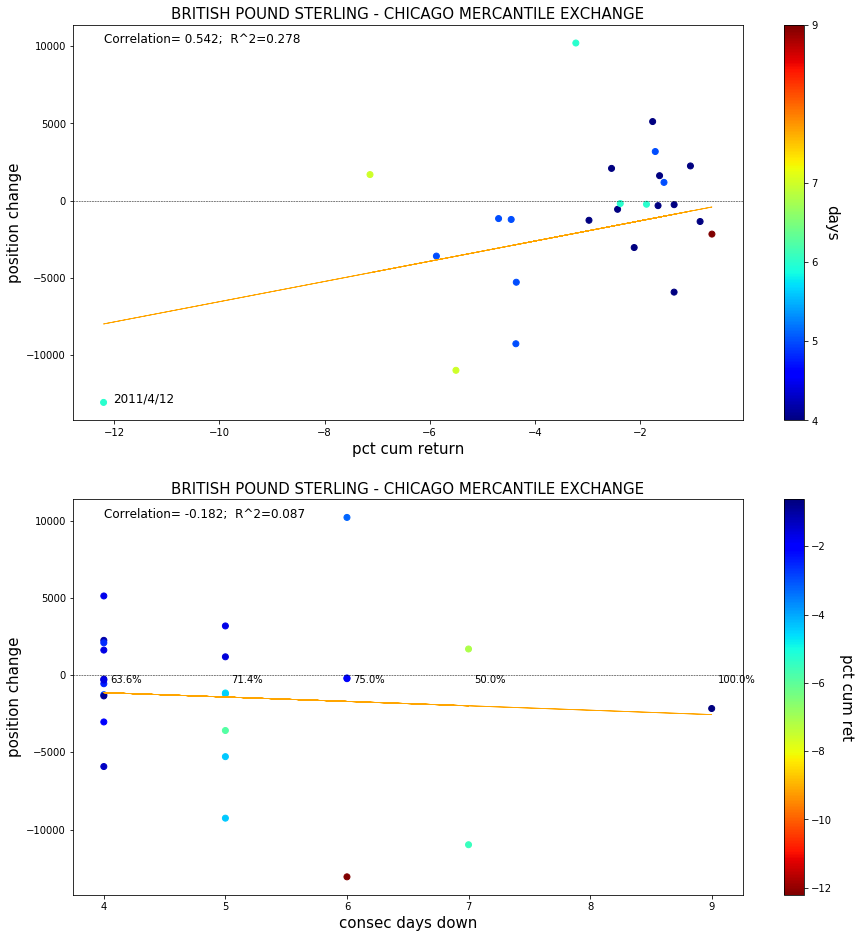

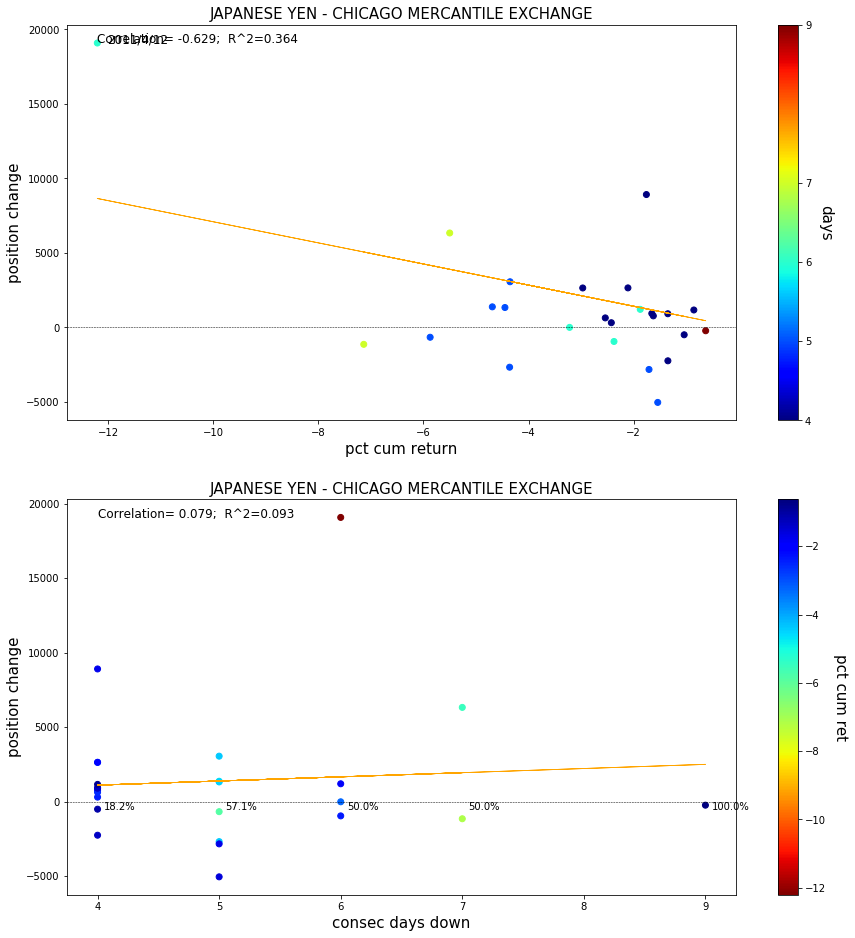

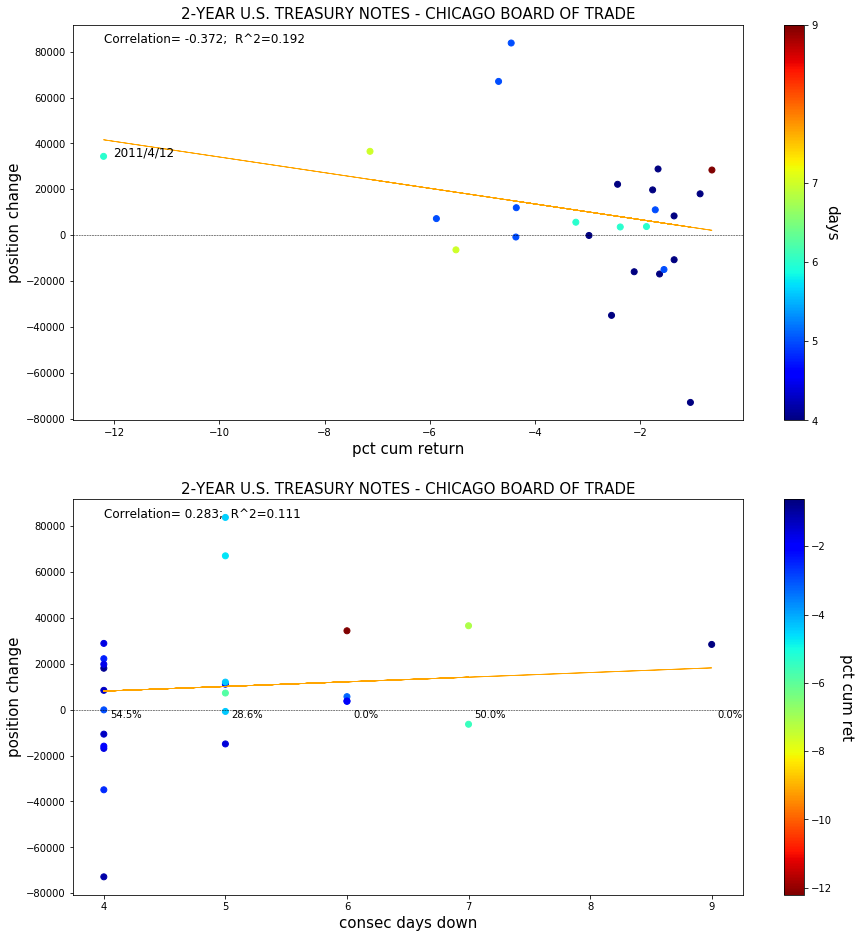

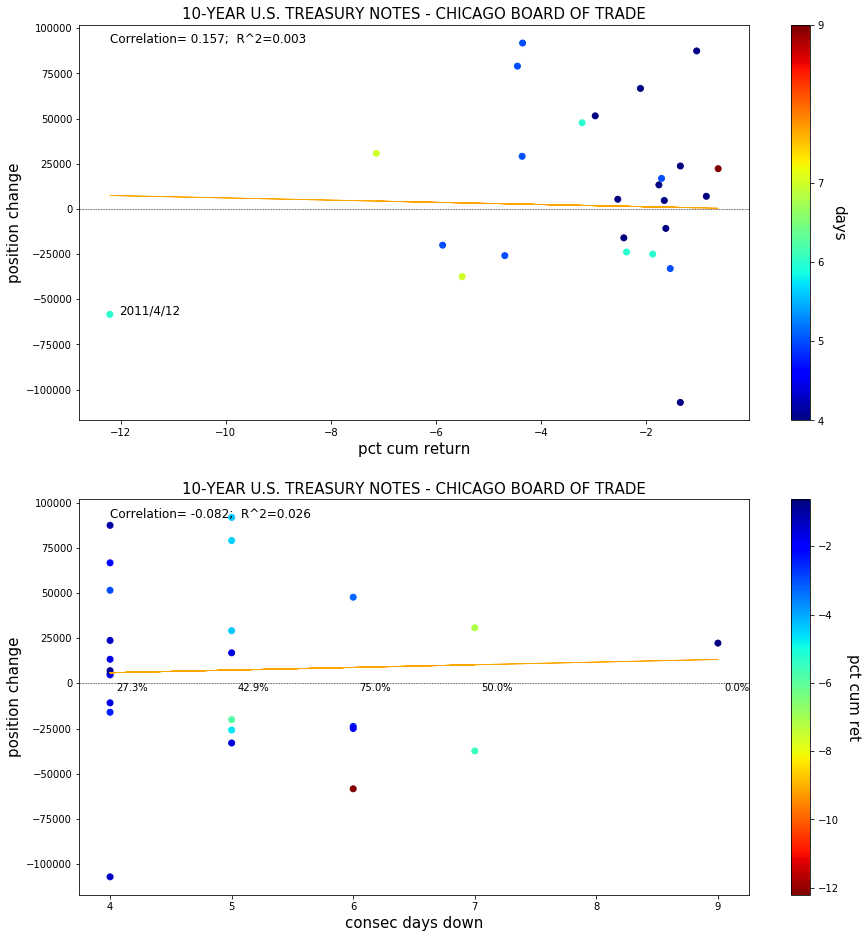

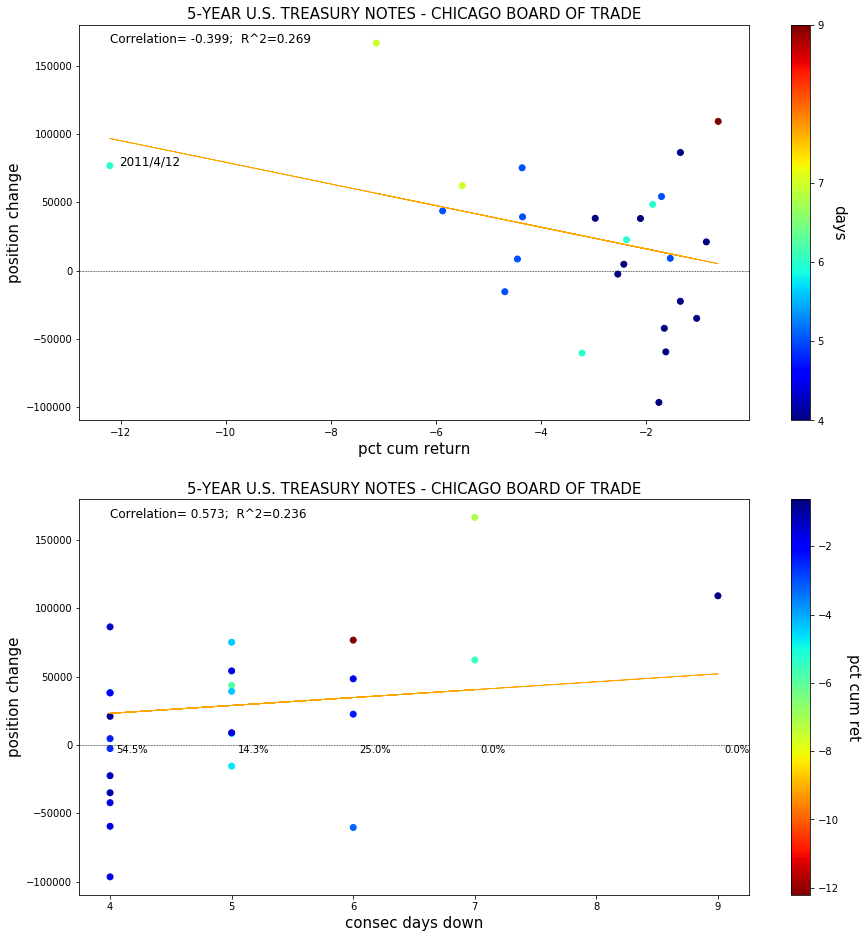

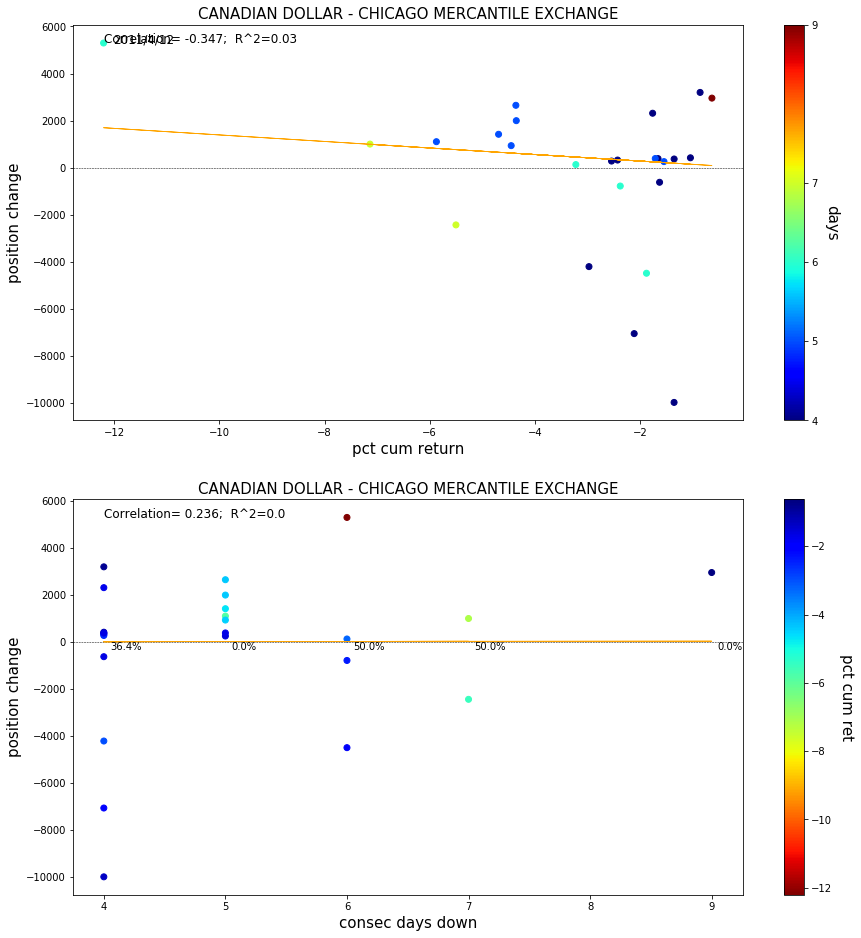

In [98]:
for key, item in dictionary_financials.items():
    df2plot = get_neg_range_days(item['Change_in_Net_Positioning_Asset_Mgr'], snp_index, 4, 10)
    plot_df(df2plot, 4, str(key))

In [99]:
to_plot7 = get_neg_range_days(dictionary_financials["E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE"]\
['Change_in_Net_Positioning_Asset_Mgr'], df["SG_CTA"], 3, 10)

# SG CTA vs S&P 500 futures positions Asset Managers

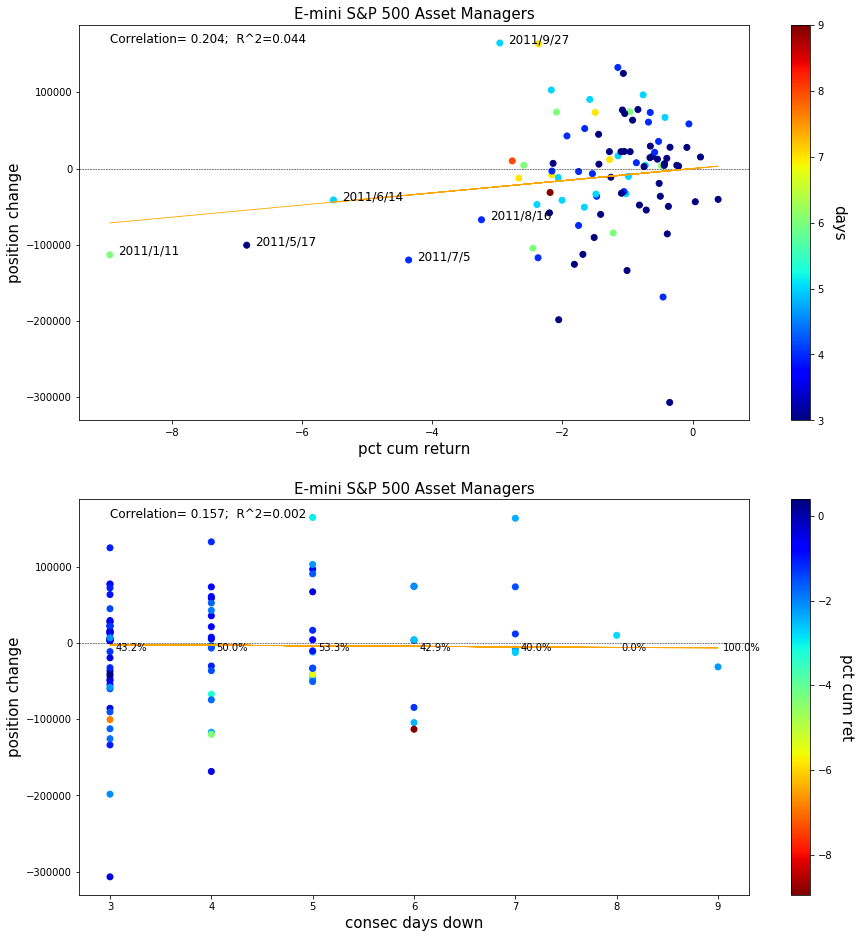

In [100]:
plot_df(to_plot7, 3, "E-mini S&P 500 Asset Managers")
# try to do with out annotated data 

In [101]:
to_plot8 = get_neg_range_days(dictionary_financials["E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE"]\
['Change_in_Net_Positioning_Lev_Money'], df["SG_CTA"], 3, 10)

# SG CTA vs S&P 500 futures positions Leveraged Money

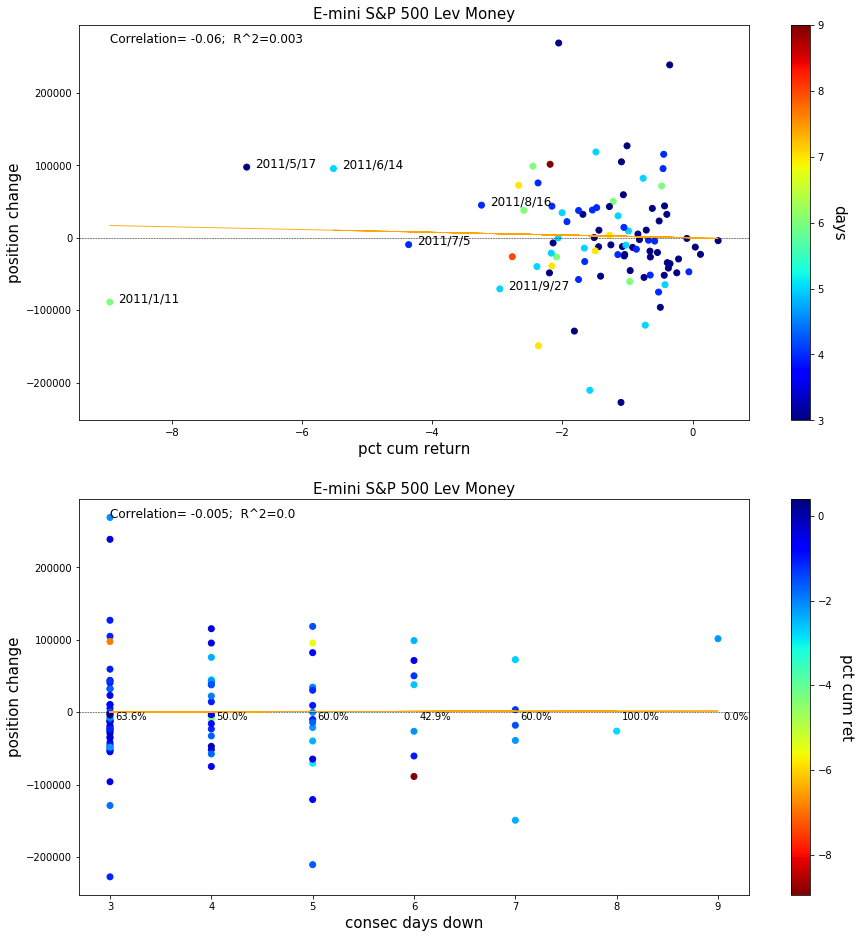

In [102]:
plot_df(to_plot8, 3, "E-mini S&P 500 Lev Money")
# try to do with out annotated data 